<font size="+5">#03. Machine Learning & Linear Regression</font>

# Load the Data

> By running the following commands:

```python
import seaborn as sns
sns.get_dataset_names()
```

> You'll observe a list of posible `tables` that we could work with.
> You may use whichever you'd like.
> Just substitue `?` by the name of the dataset you want.

```python
sns.load_dataset(name=?)
```

In [2]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
FL,17.9,3.759,5.191,16.468,16.826,1160.13,144.18
ME,15.1,5.738,4.530,13.137,12.684,661.88,96.57
SD,19.4,6.014,6.402,19.012,16.684,669.31,96.87
NV,14.7,5.439,4.704,13.965,14.553,1029.87,138.71
NE,14.9,1.937,5.215,13.857,13.410,732.28,114.82
OR,12.8,4.224,3.328,8.576,11.520,804.71,104.61
UT,11.3,4.859,1.808,9.944,10.848,809.38,109.48
OH,14.1,3.948,4.794,13.959,11.562,697.73,133.52
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39


# `LinearRegression()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

### Code Thinking

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variable**
> 2. `y`: **target varaible**
> It's recommended that you make a `Data Visualization`
>
> - To analyze if the two variables are related?
> - i.e., do you think `X` variable is good to predict `y`?
> - If so, the Linear Regression would be great!

<AxesSubplot:xlabel='alcohol', ylabel='speeding'>

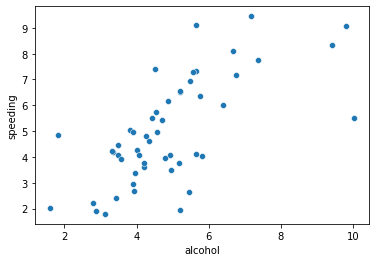

In [3]:
sns.scatterplot(x="alcohol", y="speeding", data=df)

### Scatterplot with Variables from DataFrame

> You may observe in the plot that the points could be related through a line.
>
> Otherwise, you may select another pair of variables.

In [4]:
from sklearn.linear_model import LinearRegression

### Finally `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

In [5]:
model = LinearRegression()
model.__dict__


{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

# Model Interpretation

> 1. Especify the **mathematical equation** of the model.
> 2. **Interpret the coefficients** from the equation.

In [6]:
#model.fit(x=df[["alcohol"]],y=df["speeding"])
model.fit(X=df[["alcohol"]],y=df["speeding"])

LinearRegression()

# Calculate Predictions

> - `model.predict()`

In [7]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.78150308]),
 '_residues': 112.2615161238538,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 1.1791591095991114}

In [8]:
pred = model.predict(X=df[['alcohol']])

# Visualize the Model

> 1. **Real Data**.
> 2. **Model: predictions** calculated with the mathematical equation.

<AxesSubplot:xlabel='alcohol', ylabel='speeding'>

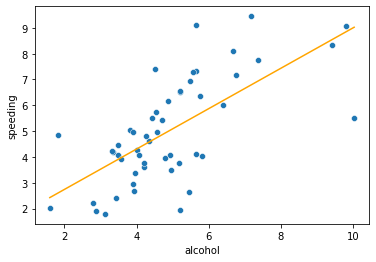

In [9]:
sns.scatterplot(x='alcohol', y='speeding', data=df)
sns.lineplot(x='alcohol', y=pred, data=df, color='orange')

# Real vs. Predicted Data

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred'] = predicciones`

In [16]:
dfsel = df[['alcohol', 'speeding']].copy()

In [17]:
dfsel['pred_lr'] = pred

> - `df.sample(10)` to check if predictions are equal to reality:

In [20]:
dfsel.sample(10)

,alcohol,speeding,pred_lr
abbrev,,,
WY,5.568,7.308,5.530568
TN,5.655,4.095,5.598559
SC,9.799,9.082,8.837108
VT,4.080,4.080,4.367692
AR,5.824,4.032,5.730633
VA,3.429,2.413,3.858933
TX,7.372,7.760,6.940400
NY,3.567,3.936,3.966781
MT,9.416,8.346,8.537792


> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

In [22]:
model.score(X = df.alcohol, y = df.speeding)

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 5.64   4.525  5.208  5.824  3.36   3.808  3.888  4.86   1.593  5.191
  3.9    7.175  4.437  4.352  4.205  3.925  4.272  4.922  6.765  4.53
  4.     2.87   3.948  2.784  5.456  5.474  9.416  5.215  4.704  3.48
  3.136  4.968  3.567  5.208 10.038  4.794  5.771  3.328  5.642  4.218
  9.799  6.402  5.655  7.372  1.808  4.08   3.429  3.498  6.664  4.554
  5.568].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
df.alcohol.shape

(51,)

In [25]:
df[['alcohol']].shape

(51, 1)

In [26]:
df.alcohol

abbrev
AL     5.640
AK     4.525
AZ     5.208
AR     5.824
CA     3.360
CO     3.808
CT     3.888
DE     4.860
DC     1.593
FL     5.191
GA     3.900
HI     7.175
ID     4.437
IL     4.352
IN     4.205
IA     3.925
KS     4.272
KY     4.922
LA     6.765
ME     4.530
MD     4.000
MA     2.870
MI     3.948
MN     2.784
MS     5.456
MO     5.474
MT     9.416
NE     5.215
NV     4.704
NH     3.480
NJ     3.136
NM     4.968
NY     3.567
NC     5.208
ND    10.038
OH     4.794
OK     5.771
OR     3.328
PA     5.642
RI     4.218
SC     9.799
SD     6.402
TN     5.655
TX     7.372
UT     1.808
VT     4.080
VA     3.429
WA     3.498
WV     6.664
WI     4.554
WY     5.568
Name: alcohol, dtype: float64

In [27]:
df[['alcohol']]

,alcohol
abbrev,
AL,5.640
AK,4.525
AZ,5.208
AR,5.824
CA,3.360
CO,3.808
CT,3.888
DE,4.860
DC,1.593


In [29]:
model.score(X = df[['alcohol']], y = df.speeding)

0.4485229555324447

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand **how the Machine Learns/Optimizes the model**
    - [X] No more than to find the best numbers in a mathematical equation.
- [X] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [X] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [X] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [X] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [X] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [X] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand **how the Machine Learns/Optimizes the model**
    - [ ] No more than to find the best numbers in a mathematical equation.
- [ ] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [ ] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [ ] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [ ] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [ ] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [ ] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.